## DIGITS Decision Tree

Done by Rosa Hortelano

In [75]:
%matplotlib inline

import numpy as np                      # Llibreria matemÃ tica
import matplotlib.pyplot as plt         # Per mostrar plots
import sklearn                          # Llibreia de DM
import sklearn.datasets as ds           # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb          # Per fer servir el knn
import pandas as pd

from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.proportion import proportion_confint
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [76]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  #plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


### Load data

In [77]:
drive.mount("/content/drive")

#to obtain the match result, we need to upload the preprocessed.csv
df = pd.read_csv('/content/drive/MyDrive/Q8/MD/Projecte2/preprocessed.csv')

#we are going to do the algorithm with these one
df_encoded = pd.read_csv('/content/drive/MyDrive/Q8/MD/Projecte2/preprocessed_encoded.csv')

# Display the preprocessed data
#print(df_encoded)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
y = df['match']

#erase columns that are not necessary for the study
df_encoded = df_encoded.drop(columns=['decision_0'])
df_encoded = df_encoded.drop(columns=['decision_1'])
df_encoded = df_encoded.drop(columns=['decision_o_0'])
df_encoded = df_encoded.drop(columns=['decision_o_1'])

X = df_encoded

# Split the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalization of the data starting from information of just the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the scaler to the test set
X_test = scaler.transform(X_test)

### Balance dataset

In [79]:
#Balance the dataset

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

# Train your model using the balanced dataset
clf = GaussianNB()
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test_resampled)

#print('Classification Report:\n', classification_report(y_test_resampled, y_pred))

## Train Naive Bayes to compare results


------------------Naive Bayes--------------------
Metrics of Unbalanced Dataset



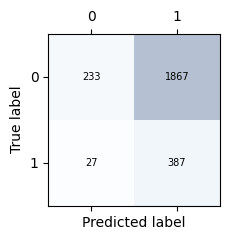


Accuracy: 0.2466189339697693

              precision    recall  f1-score   support

           0       0.90      0.11      0.20      2100
           1       0.17      0.93      0.29       414

    accuracy                           0.25      2514
   macro avg       0.53      0.52      0.24      2514
weighted avg       0.78      0.25      0.21      2514

--------------------------------------

Metrics of Balanced Dataset



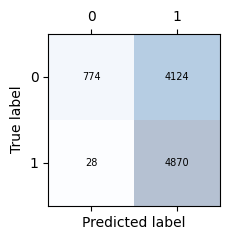


Accuracy: 0.5761535320538995
              precision    recall  f1-score   support

           0       0.97      0.16      0.27      4898
           1       0.54      0.99      0.70      4898

    accuracy                           0.58      9796
   macro avg       0.75      0.58      0.49      9796
weighted avg       0.75      0.58      0.49      9796

0.5761535320538995


In [80]:
#compare Naive Bayes with unbalanced data and balanced

print("------------------Naive Bayes--------------------")
print("Metrics of Unbalanced Dataset")
print()

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, pred)

prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()

print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

print("--------------------------------------")
print()
print("Metrics of Balanced Dataset")
print()

clfB = GaussianNB()
predB = clf.fit(X_train_resampled, y_train_resampled).predict(X_train_resampled)
confmat = sklearn.metrics.confusion_matrix(y_train_resampled, predB)

prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_train_resampled, predB))

report = sklearn.metrics.classification_report(y_train_resampled, predB)

print(sklearn.metrics.classification_report(y_train_resampled, predB))
epsilonB = sklearn.metrics.accuracy_score(y_train_resampled, predB)
print(epsilonB)


### Train and Print A Decision Tree

------------------Decision Tree--------------------

Metrics of Unbalanced Dataset

0.7907716785998409


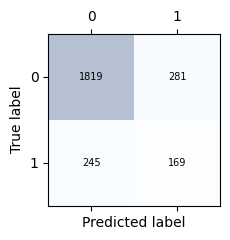

None

Accuracy: 0.7907716785998409

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2100
           1       0.38      0.41      0.39       414

    accuracy                           0.79      2514
   macro avg       0.63      0.64      0.63      2514
weighted avg       0.80      0.79      0.79      2514

(0.7742975816884385, 0.8063203129155743)


--------------------------------------


Metrics of Balanced Dataset

0.6369047619047619


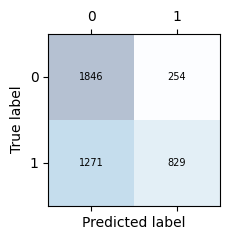


Accuracy: 0.6369047619047619

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      2100
           1       0.77      0.39      0.52      2100

    accuracy                           0.64      4200
   macro avg       0.68      0.64      0.61      4200
weighted avg       0.68      0.64      0.61      4200

(0.6221515156076873, 0.6514394078037358)


In [81]:
#compare Decision Tree with unbalanced data and balanced

print("------------------Decision Tree--------------------")

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print()
print("Metrics of Unbalanced Dataset")
print()

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

confmat = sklearn.metrics.confusion_matrix(y_test, pred)
print(prettyConfusionMatrix(confmat))

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()

print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)

print(proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

print()
print()
print("--------------------------------------")
print()
print()
print("Metrics of Balanced Dataset")
print()

clfB = tree.DecisionTreeClassifier(criterion='entropy')
clfB = clf.fit(X_train_resampled, y_train_resampled)
predB = clf.predict(X_test_resampled)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test_resampled, y_test_resampled))

confmat = sklearn.metrics.confusion_matrix(y_test_resampled, predB)
prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test_resampled, predB))
print()

print(sklearn.metrics.classification_report(y_test_resampled, predB))
epsilon = sklearn.metrics.accuracy_score(y_test_resampled, predB)

print(proportion_confint(count=epsilon*X_test_resampled.shape[0], nobs=X_test_resampled.shape[0], alpha=0.05, method='binom_test'))



### Representation of a Decision *Tree*

In [82]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('brown', 'forestgreen','blue')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

print(graph)

0.7069047619047619


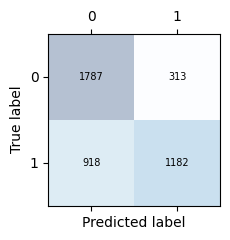


Accuracy: 0.7069047619047619

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2100
           1       0.79      0.56      0.66      2100

    accuracy                           0.71      4200
   macro avg       0.73      0.71      0.70      4200
weighted avg       0.73      0.71      0.70      4200



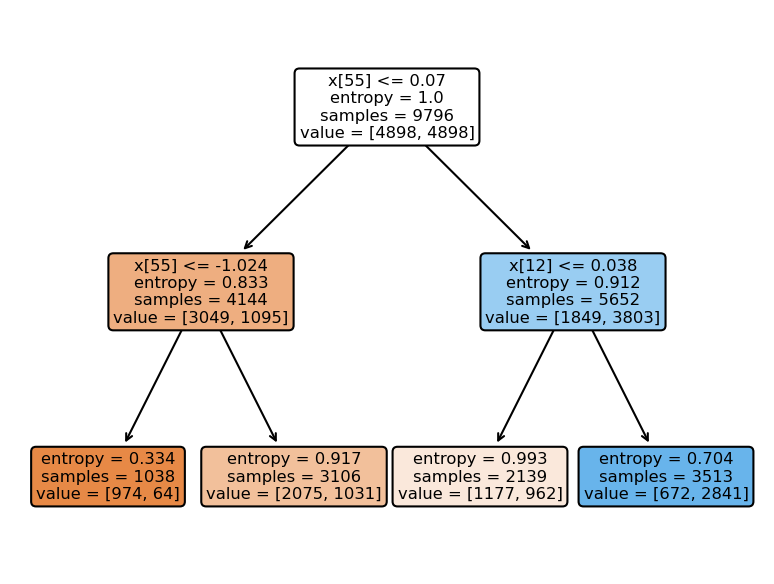

In [83]:
X_train = X_train_resampled
y_train = y_train_resampled
X_test = X_test_resampled
y_test = y_test_resampled

clf = DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = 4,
    min_impurity_decrease = 0.02
)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

confmat = sklearn.metrics.confusion_matrix(y_test, prediction)
prettyConfusionMatrix(confmat)

print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")

print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

fig = plt.gcf()
fig.set_dpi(150)
tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('tree.png')
plt.show()

### Selecting the best parameters

Best Params = {'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_split': 2},  -  Accuracy = 0.8584123741427113
0.7002380952380952


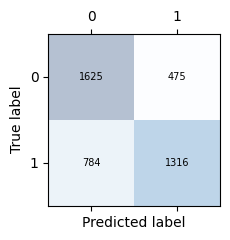


Accuracy: 0.7002380952380952

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2100
           1       0.73      0.63      0.68      2100

    accuracy                           0.70      4200
   macro avg       0.70      0.70      0.70      4200
weighted avg       0.70      0.70      0.70      4200

0.7002380952380952


In [88]:
params = {
    "min_impurity_decrease": np.linspace(0, 0.1, 5),
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 7, 10],  # Limiting to a few key depths
}

#Create the GridSearchCV object
clf = GridSearchCV(
    DecisionTreeClassifier(criterion="entropy"),
    param_grid=params,
    cv=10,
    n_jobs=-1,
)

#Fit the GridSearchCV object to the data
clf.fit(X_train_resampled, y_train_resampled)

#Print the best parameters and best score
print(f"Best Params = {clf.best_params_},  -  Accuracy = {clf.best_score_}")

#Train the Decision Tree classifier with the best parameters found
best_params = clf.best_params_
cdt = tree.DecisionTreeClassifier(
    criterion="entropy",
    **best_params
)

clf = cdt.fit(X_train_resampled, y_train_resampled)
predic = clf.predict(X_test_resampled)

#Obtain accuracy score of learned classifier on test data
print(clf.score(X_test_resampled, y_test_resampled))

confmat = sklearn.metrics.confusion_matrix(y_test_resampled, predic)
prettyConfusionMatrix(confmat)

#Print detailed classification report
print(f"\nAccuracy: {accuracy_score(y_test_resampled, predic)}\n")
print(classification_report(y_test_resampled, predic))

epsilon = accuracy_score(y_test_resampled, predic)
print(epsilon)


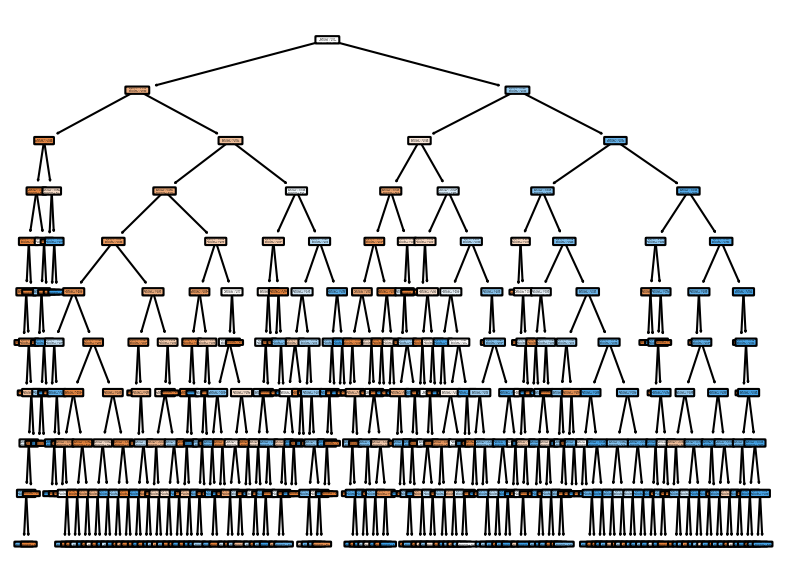

In [89]:
#print the decision tree
fig = plt.gcf()
fig.set_dpi(150)
tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('2nd_tree.png')
plt.show()